In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = yf.download('CT=F', start='1988-01-04', end='2024-06-13')

[*********************100%%**********************]  1 of 1 completed


In [17]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,50.430000,51.099998,50.349998,51.070000,51.070000,8033
2000-01-04,50.900002,50.970001,50.250000,50.730000,50.730000,4709
2000-01-05,50.750000,51.840000,50.750000,51.560001,51.560001,10464
2000-01-06,51.900002,52.099998,51.549999,52.080002,52.080002,7247
2000-01-07,52.080002,54.049999,51.900002,53.959999,53.959999,19389
...,...,...,...,...,...,...
2024-06-06,74.330002,75.910004,73.699997,75.440002,75.440002,21192
2024-06-07,75.610001,76.000000,73.540001,73.839996,73.839996,23032
2024-06-10,73.839996,74.279999,71.279999,71.809998,71.809998,23032


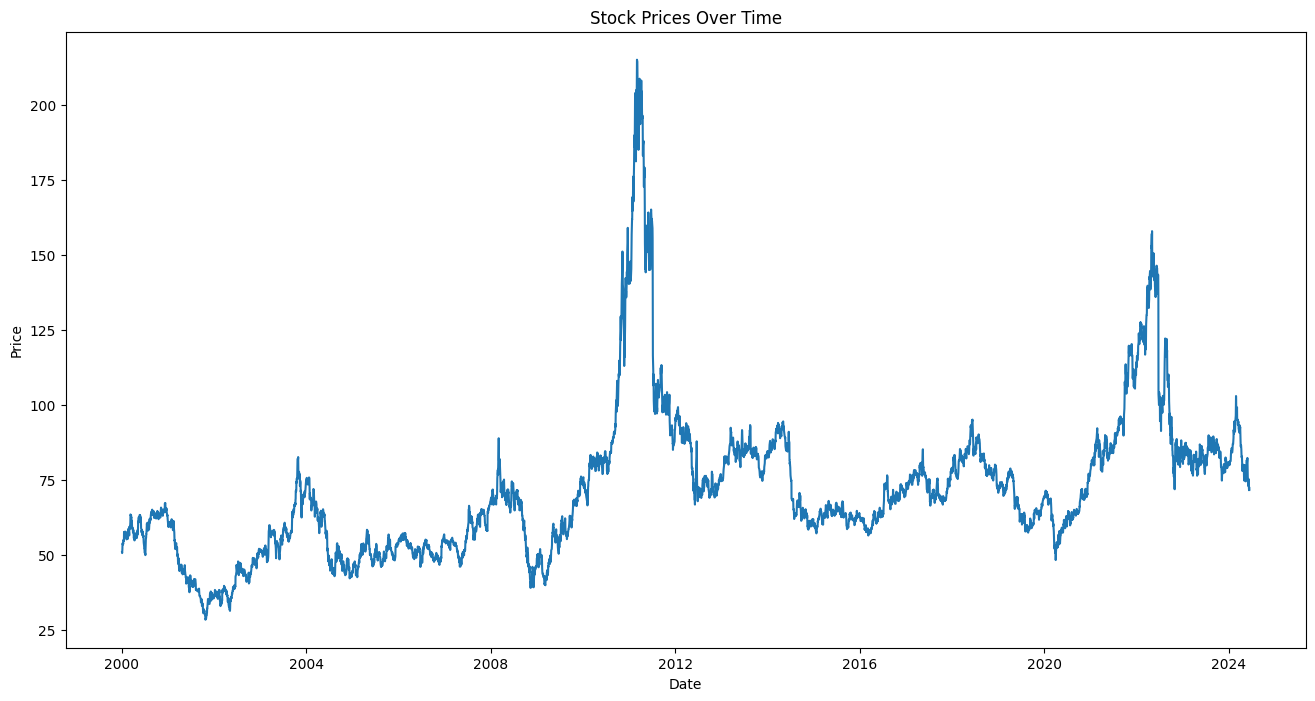

In [18]:
#visualizza the historical stock prices
plt.figure(figsize=(16, 8))
plt.plot(data['Adj Close'])#plotting the adjusted closing price
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [19]:
df=data.reset_index() #le date divebntano una colonna regolare del dataframe
df=df[['Date','Close']] #seleziono solo le colonne che mi interessano
df=df.rename(columns={'Date':'ds','Close':'y'}) #rinomino le colonne per usare il modello prophet

In [20]:
!pip install prophet


In [21]:
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

In [23]:
m=Prophet()

In [24]:
m.fit(df)

13:01:57 - cmdstanpy - INFO - Chain [1] start processing
13:02:00 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
futuro = m.make_future_dataframe(periods=365) #aggiungo 365 giorni al mio dataframe

In [26]:
forecast=m.predict(futuro)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-03,59.872371,45.903604,79.088773,59.872371,59.872371,1.541159,1.541159,1.541159,2.138511,2.138511,2.138511,-0.597352,-0.597352,-0.597352,0.0,0.0,0.0,61.413530
1,2000-01-04,59.843211,44.481820,77.338276,59.843211,59.843211,1.582046,1.582046,1.582046,2.146770,2.146770,2.146770,-0.564725,-0.564725,-0.564725,0.0,0.0,0.0,61.425257
2,2000-01-05,59.814051,45.776156,77.662921,59.814051,59.814051,1.658088,1.658088,1.658088,2.181003,2.181003,2.181003,-0.522915,-0.522915,-0.522915,0.0,0.0,0.0,61.472139
3,2000-01-06,59.784892,46.672607,77.563577,59.784892,59.784892,1.682654,1.682654,1.682654,2.153819,2.153819,2.153819,-0.471165,-0.471165,-0.471165,0.0,0.0,0.0,61.467546
4,2000-01-07,59.755732,45.218499,77.666881,59.755732,59.755732,1.688384,1.688384,1.688384,2.097392,2.097392,2.097392,-0.409009,-0.409009,-0.409009,0.0,0.0,0.0,61.444116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,2025-06-08,102.010222,77.814177,117.071377,90.388111,113.059082,-4.461288,-4.461288,-4.461288,-5.358746,-5.358746,-5.358746,0.897458,0.897458,0.897458,0.0,0.0,0.0,97.548934
6490,2025-06-09,102.024766,83.713018,126.741869,90.336618,113.136505,3.097151,3.097151,3.097151,2.138511,2.138511,2.138511,0.958640,0.958640,0.958640,0.0,0.0,0.0,105.121918
6491,2025-06-10,102.039311,84.033590,124.837144,90.361247,113.213929,3.165533,3.165533,3.165533,2.146770,2.146770,2.146770,1.018762,1.018762,1.018762,0.0,0.0,0.0,105.204844
6492,2025-06-11,102.053855,83.919302,125.565634,90.385877,113.265621,3.256367,3.256367,3.256367,2.181003,2.181003,2.181003,1.075364,1.075364,1.075364,0.0,0.0,0.0,105.310222


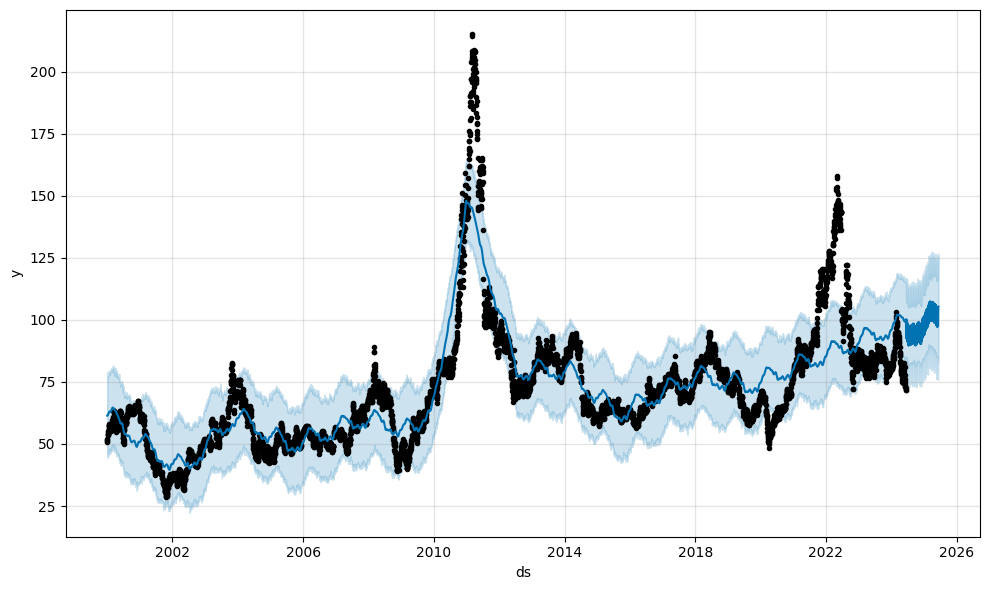

In [28]:
fig1 = m.plot(forecast)

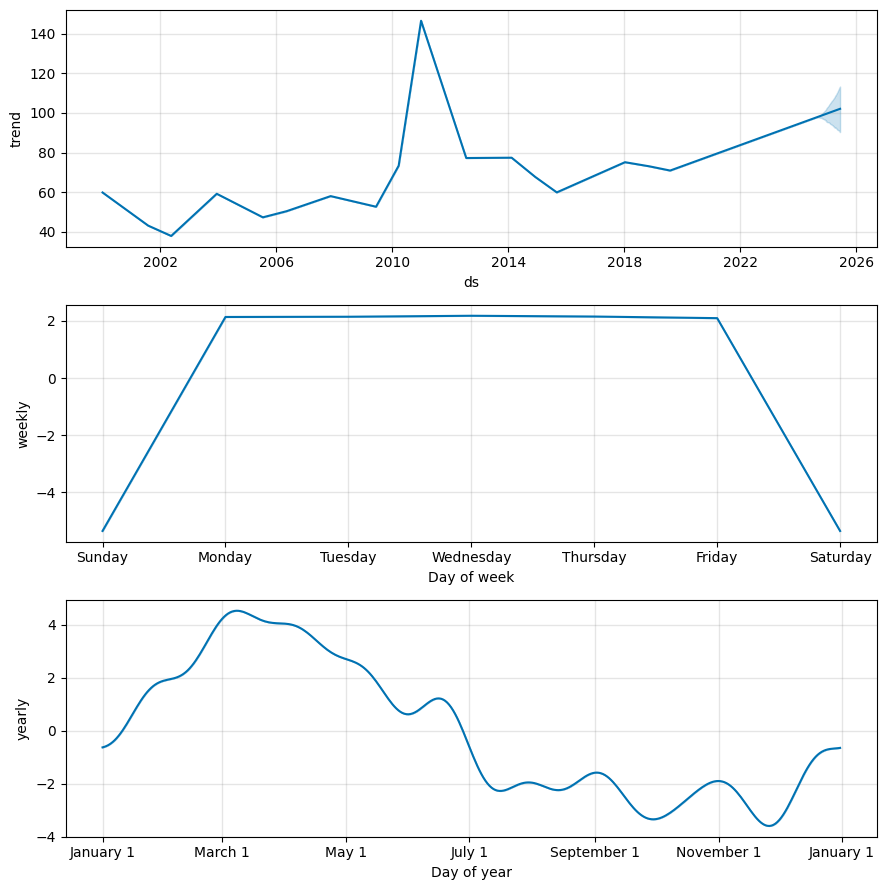

In [29]:
fig2=m.plot_components(forecast)